In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


In [3]:
X_train.shape
(25000,)



(25000,)

In [4]:
X_test.shape
(25000,)



(25000,)

In [5]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [7]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))
      

Average Review length: 234.75892
Standard Deviation: 173


In [8]:
print("Label:", label[0])

Label: 1


In [9]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [11]:
data = vectorize(data)
label = np.array(label).astype("float32")

<AxesSubplot:xlabel='label', ylabel='count'>

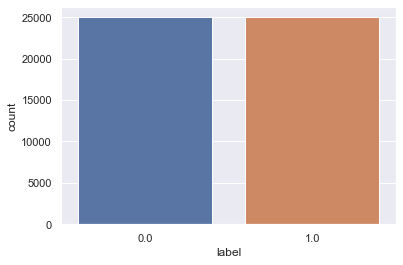

In [12]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.30, random_state=42)

In [14]:
X_train.shape

(35000, 10000)

In [15]:

from keras import models
from keras import layers
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [16]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)


In [17]:
results = model.fit(
X_train, y_train,
epochs= 10,
batch_size = 40,
validation_data = (X_test, y_test),
callbacks=[callback]
)


Epoch 1/10
875/875 [==============================] - 17s 17ms/step - loss: 0.3259 - accuracy: 0.8617 - val_loss: 0.2578 - val_accuracy: 0.8949
Epoch 2/10
875/875 [==============================] - 8s 9ms/step - loss: 0.2008 - accuracy: 0.9213 - val_loss: 0.2670 - val_accuracy: 0.8929
Epoch 3/10
875/875 [==============================] - 7s 9ms/step - loss: 0.1414 - accuracy: 0.9461 - val_loss: 0.3118 - val_accuracy: 0.8874
Epoch 4/10
875/875 [==============================] - 7s 8ms/step - loss: 0.1023 - accuracy: 0.9628 - val_loss: 0.3678 - val_accuracy: 0.8893
Epoch 5/10
875/875 [==============================] - 7s 8ms/step - loss: 0.0771 - accuracy: 0.9715 - val_loss: 0.3860 - val_accuracy: 0.8864
Epoch 6/10
875/875 [==============================] - 7s 8ms/step - loss: 0.0632 - accuracy: 0.9760 - val_loss: 0.4579 - val_accuracy: 0.8850
Epoch 7/10
875/875 [==============================] - 7s 8ms/step - loss: 0.0537 - accuracy: 0.9794 - val_loss: 0.4854 - val_accuracy: 0.8817
Epoc

In [18]:
print(np.mean(results.history["val_accuracy"]))


0.8865399897098541


In [19]:
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

30/30 [==============================] - 1s 22ms/step - loss: 0.5307 - accuracy: 0.8827
Test loss: 0.5307289958000183
Test accuracy: 0.8827333450317383


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


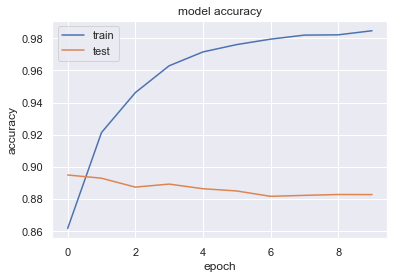

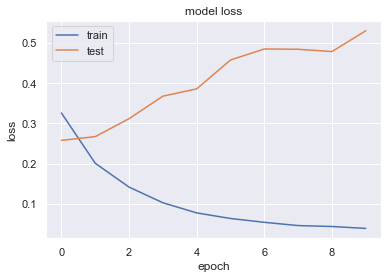

In [20]:
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.predict(X_test)

array([[3.493572e-12],
       [6.422404e-06],
       [6.889646e-01],
       ...,
       [9.941994e-01],
       [1.949222e-05],
       [4.233569e-06]], dtype=float32)